# Assignment 3 – Topic Modeling and Clustering for Online Social Media Data

*Due: Friday January 12 at 14:00 CET*

In the third assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use topic modeling and clustering to identify topics in online social media data. The objectives of this assignment are:
- understand and process the text data
- use the clustering algorithm to determine clusters in real-life data
- use the Latent Dirichlet Allocation algorithm to identify discussed topics in real-life text data 
- use the visualization tools to validate the results of unsupervised learning and interpret your findings
- reflect on the difference between two type of unsupervised learning algorithms

In this assignment, you are going to discover the different ‘topics’ from a real social media text dataset. The project is divided into two parts (4 subtasks):

- The first part contains data processing (1.1) and feature extraction (1.2) from the raw text data.
- In the second part, you will implement two methods (2.1), a topic modeling method and a clustering method, to identify topics from the processed data. Then, the evaluation will be done by using visualization tools (2.2). 

Provided files:
- The dataset: data/raw_data.txt
- A tutorial notebook showcases some packages you could use for this assignment (optional): Ass3_tutorial.ipynb
- Some sample visualization codes for interpreting the topic results: viz_example.ipynb

In [1]:
import io

# TODO: import the packages


 ## Dataset:
 The data used in this assignment is Dutch text data. We collected the COVID-19 crisis related messages from online social media (Twitter) from January to November 2021. Then, a subset of raw tweets was randomly sampled. In total, our dataset includes the text data of about 100K messages. **To protect the data privacy, please only use this dataset within the course.**

In [2]:
# read the data

def phase0_open_txt_stream(filename):
    return io.open(filename, "r", encoding="utf-8")


pipe = phase0_open_txt_stream("data/raw_data.txt")

for i in range(5):
    print(next(pipe))
    print("")

pipe.close()


Hahah, het verzet is begonnen. Het knalt hier op z'n best hoor. Voor mijn dieren vind ik het erg, maar f@ck die maffe regering hier. Gelukkig nieuwjaar!


RT @D66Vught: Het is 2021! https://t.co/LpPuFPuqR8


@MijumewAndCo Happy new year mij!


Fantastisch dat ik zoveel vuurwerk hoor..... We worden echt wakker yes. En het boeit mij niet wat een ander er van denkt.\nOp naar een Great Awakening en happy new year 😃🎉🙏❤️


Gelukkig nieuwjaar allemaal!!!! Binnen exact een maand ben ik jarig en ik hoop dat ik dan eindelijk birthdaySEX kan hebben xxx




 ## 0. Before you start the Project: 
 The provided messages in the raw dataset were collected based on 10 different themes that relate to the COVID-19 crisis. Here is a list of all themes:
 -	Lockdown
 -	Face mask
 -	Social distancing
 -	Loneliness
 -	Happiness
 -	Vaccine
 -	Testing
 -  Curfew
 -  Covid entry pass
 -  Work from home

Before starting your project, you need to first filter the messages (all messages are in Dutch) and use the messages belonging to only one theme for the topic identification. 
 
If you have submitted the theme preference, you can skip the following paragraph.

*Please notice that there will be maximum two teams working on a same theme. In this way, we hope that each group will develop their own dataset and come up with interesting results.*

# 1.0 Exploratory analyses

We have conducted three forms of exploratory analyses:
1. Mention and Hashtag analysis, a method explicitly tailored towards tweet-based data. It can be used to get an overview of possibly fruitful search terms to use in our eventual queries.
2. Descriptive analysis, in order to describe why certain words or persons were frequently mentioned in the Dutch twitter community during the pandimic. As twitter is a digital platform where every individual is able to post their thoughts, there are a lot of non-academic, and sometimes quite creative, synonyms used for face masks. Thus, we have chosen to quickly go over a few of our search terms, in order to explain their choice and meaning.
3. Frequency analysis, visualized using a word cloud.

In [3]:
import pandas as pd

 ## 1.1 Data Processing
 In the first part of the assignment, please first filter the messages and use the messages belonging to your allocated theme for the identification of topics. For that you will need to:
 -	Design your query (e.g. a regular expression or a set of keywords) and filter the related messages for your allocated theme. 
 -	Clean your filtered messages and preprocess them into the right representation. Please refer to the text data pre-processing and representation methods discussed in the lecture. You may use some of the recommended packages for text data preprocessing and representation.

In [4]:
# TODO: filter the related messages
# TODO: clean and preprocess the messages
# TODO: represent the messages into formats that can be used in clustering or LDA algorithms (you may need different represention for two algorithms)

# Aanpak: Ten eerste alle woorden die enigszins overeen komen met "mondkap", of synoniemen, in een nieuwe .txt zetten.
#          Gebruik hiervoor het regex pakket
# Woorden waarop we zoeken: "mondkap", "kapje", "faceshield", "face shield", "mask", "doublemask", "double-mask", "muilkorf", "beklap", "mondluier" , "bekluier" (wel lekker creatief deze)
#
#
# Mogelijke probleemwoorden: "masked" (zit een tweet bij over dat skeere masked singer programma, kunnen we anders gwn handmatig eruit halen).
#                             EDIT: waarschijnlijk noemt hij zichzelf een 'masked singer' en heeft het dus wel betrekking op mondkapjes?
#                            "kap" (dan krijg je ook alle tweets met het woord "kappen", of "kap ermee").
#                              "kap op" geeft wel consistent juiste resultaten, zoals "weer zo'n kutkap op".
#                            lijn 52639. Indirecte referentie naar mondkapje... hoe vinden we die?
#
#
#
# Algemeen probleem: Sommige tweets staan dubbel of driedrubbel.
#  Zal ff een manier vinden om dit nog te cleanen.
#  EDIT: Zijn dit misschien retweets? Is het dan wel de bedoeling deze eruit te halen?
#        In feite is een retweet in dit geval gewoon een mening die iemand ook heeft, alleen te lui is zelf uit te typen.
#        Like als het een ander persoon is die dit deelt, is het misschien onterecht dit eruit te halen?
#        Het lijken geen chatbots te zijn in ieder geval.
#
#
# Twijfelachtige toevoegingen: "coronadeal". Meest bekende en resultaatgevende is natuurlijk de mondkapjesdeal, maar wordt natuurlijk voor meerdere deals gebruikt.
#                                Zouden we anders handmatig moeten dubbelchecken...
#                                ...maar gaat tevens ook niet over het daadwerkelijk dragen van gezichtsbescherming, dus is een beetje een einzelganger als we hem toevoegen.
#                                
#                               "...get out my face voor dat ik je samenbreng met je overleden goudvis" wint creativiteitsprijs van de dataset
#
#
# Voeg hier andere bevindingen toe: ...


# regex import, zit al in anaconda.
#  Heb echter niet echt een functionaliteit ervoor gevonden tot nu toe. 
#  Zelfs bij het woord 'mask' zijn er maar circa 2 zinnen die je niet wilt (masked singer + gast met 'mask' in zn naam)
import re


# Pak eerst alle tweets betreft mondkapjes
with open('data/raw_data.txt', 'r', encoding='utf-8') as file:
    tweets = file.readlines()
    
zoektermen = ['mondkap', 'mondneus', 'mond neus', 'mond kap', 'mondlap', 'mond-', 'kapje', 'kap', 'kap op', 'bedekking', 'faceshield', 'face shield', 'sywert', 'mask', 'FFP', 'muilkor', 'muilmask' , 'muillap', 'beklap', 'mondluier', 'bekluier']
mondkapjesTweets = [tweet for tweet in tweets if any(zoekterm in tweet.lower() for zoekterm in zoektermen)]
    
with open('data/mondkapjes_data.txt', 'w', encoding='utf-8') as file:
    file.writelines(mondkapjesTweets)

In [5]:
# Verwijder dan meegepikte tweets die je eigenlijk niet wilt
with open('data/mondkapjes_data.txt', 'r', encoding='utf-8') as file:
    tweets = file.readlines()

antiZoektermen = ['kap er', 'kap nou', 'kappen nou']
mondkapjesTweetsCleaned = [tweet for tweet in tweets if all(term not in tweet.lower() for term in antiZoektermen)]
mondkapjesTweetsCleanedGesorteerd = sorted(mondkapjesTweetsCleaned, key=str.lower)

# Door de lijst op te slaan als set worden alle dubbele tweets niet meegenomen.
#  Beetje zoals een hashSet werkt eigenlijk.
#  Doe dit als je gelijk een .txt bestand wilt met alleen enkele tweets erin, maar let op dat dit misschien niet de bedoeling is.
#   Dit kunnen retweets zijn, die we eigenlijk ook dienen mee te nemen toch?
#   Je kan deze lijn ook weg-commenten om in het volgende block een overzicht te krijgen van dubbele tweets.
#setTransformatie = list(set(mondkapjesTweetsCleaned))

with open('data/cleaned_mondkapjes_data.txt', 'w', encoding='utf-8') as file:
    file.writelines(mondkapjesTweetsCleanedGesorteerd)
    

#  Zet hier wat handmatige verwijderingen neer.
#  Beetje overkill om voor één enkele tweet wat code te schrijven...
# > Verwijder handmatig de tweet eruit met user @Unmaskingtheli1 erin.


In [6]:
# Manier om ENKEL een overzicht te krijgen van de dubbele tweets, maar is niet perse nodig meer.
#  Kunnen eigenlijk gewoon vorige .txt ook sorteren voor een overzicht.

#with open('data/cleaned_mondkapjes_data.txt', 'r', encoding='utf-8') as file:
#    tweets = file.readlines()
#
#dubbeleTweets = [tweet for tweet in tweets if tweets.count(tweet) > 1]
#dubbeleTweetsGesorteerd = sorted(dubbeleTweets, key=str.lower)

## Sla de unieke tweets op in een nieuwe .txt
#with open('data/cleaned_mondkapjes_data_doubletweets.txt', 'w', encoding='utf-8') as file:
#    file.writelines(dubbeleTweets)

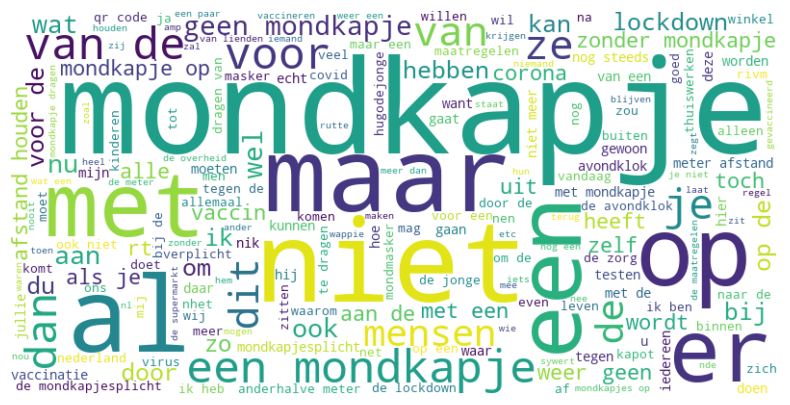

In [22]:
# Probeer wordcloud te maken.
# Methode van viz zoals in tutorial 3 is niet heel uitgebreid...
# Gebruik dus gewoon een wat meer gebruikte library

# pleur dit hieronder in je Anaconda prompt. In-line installs heb ik niet zo'n succes mee:
# conda install -c conda-forge wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

with open('data/cleaned_mondkapjes_data.txt', 'r', encoding='utf-8') as file:
    tweets = file.readlines()
tweetsJoined = ' '.join(tweets)  # Combineer regels tot één lange string
tweetsJoined = tweetsJoined.lower()  # Zet alles om naar kleine letters  

# Voeg een paar stopwords toe. 
# Soms weergeeft de wordcloud losse letters, ik denk dat dat komt door hyperlinks / usernames en dergelijke.
#  (waar de letters achter een punt o.i.d. staan)
stopwords = set(STOPWORDS)
stopwords.update(["https", "t" , "co" , "het", "die", "dat", "zijn", "nhttp", "nhttps", "n", "m", "en"])
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate(tweetsJoined)



plt.figure(figsize=[10, 5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
import numpy as np
from PIL import Image

# Probeer wordcloud in mooie vorm te krijgen
wordcloud_omhulsel = np.array(Image.open("data/wordcloudOmhulsel3.jpg"))

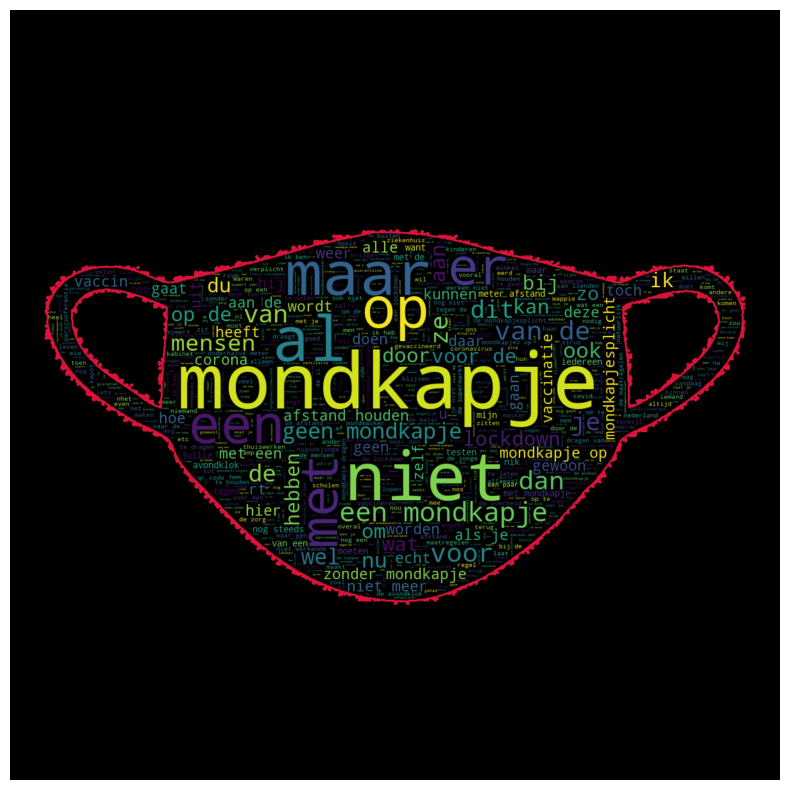

In [9]:
# Maakt een wat gecustomiseerde wordcloud
# Misschien moeten we wat meer stopwords toevoegen, maar weet niet of dat minder 'puur' is.
stopwords = set(STOPWORDS)
stopwords.update(["https", "t" , "co" , "het", "die", "dat", "zijn", "nhttp", "nhttps", "n", "m", "en"])
wc = WordCloud(background_color="black", max_words=1000, mask=wordcloud_omhulsel,
               stopwords=stopwords, contour_width=3, contour_color='crimson').generate(tweetsJoined)

wordcloudV2 = plt.figure(figsize=[50,10])

# probeer mogelijk ook 'nearest' of 'bicubic' interpolation. 
# Zou effect moeten hebben als je de afbeelding veel groter of kleiner maakt, maar heb er niet super verschil in gezien
# bilinear is standaardmethode, datapunten berekend op basis van weigthed mean omliggende punten
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off")
plt.show()

# Voor als je het als svg wilt opslaan
#wordcloudV2.savefig("wordcloudV2.svg")

# Hashtag & Mention analysis

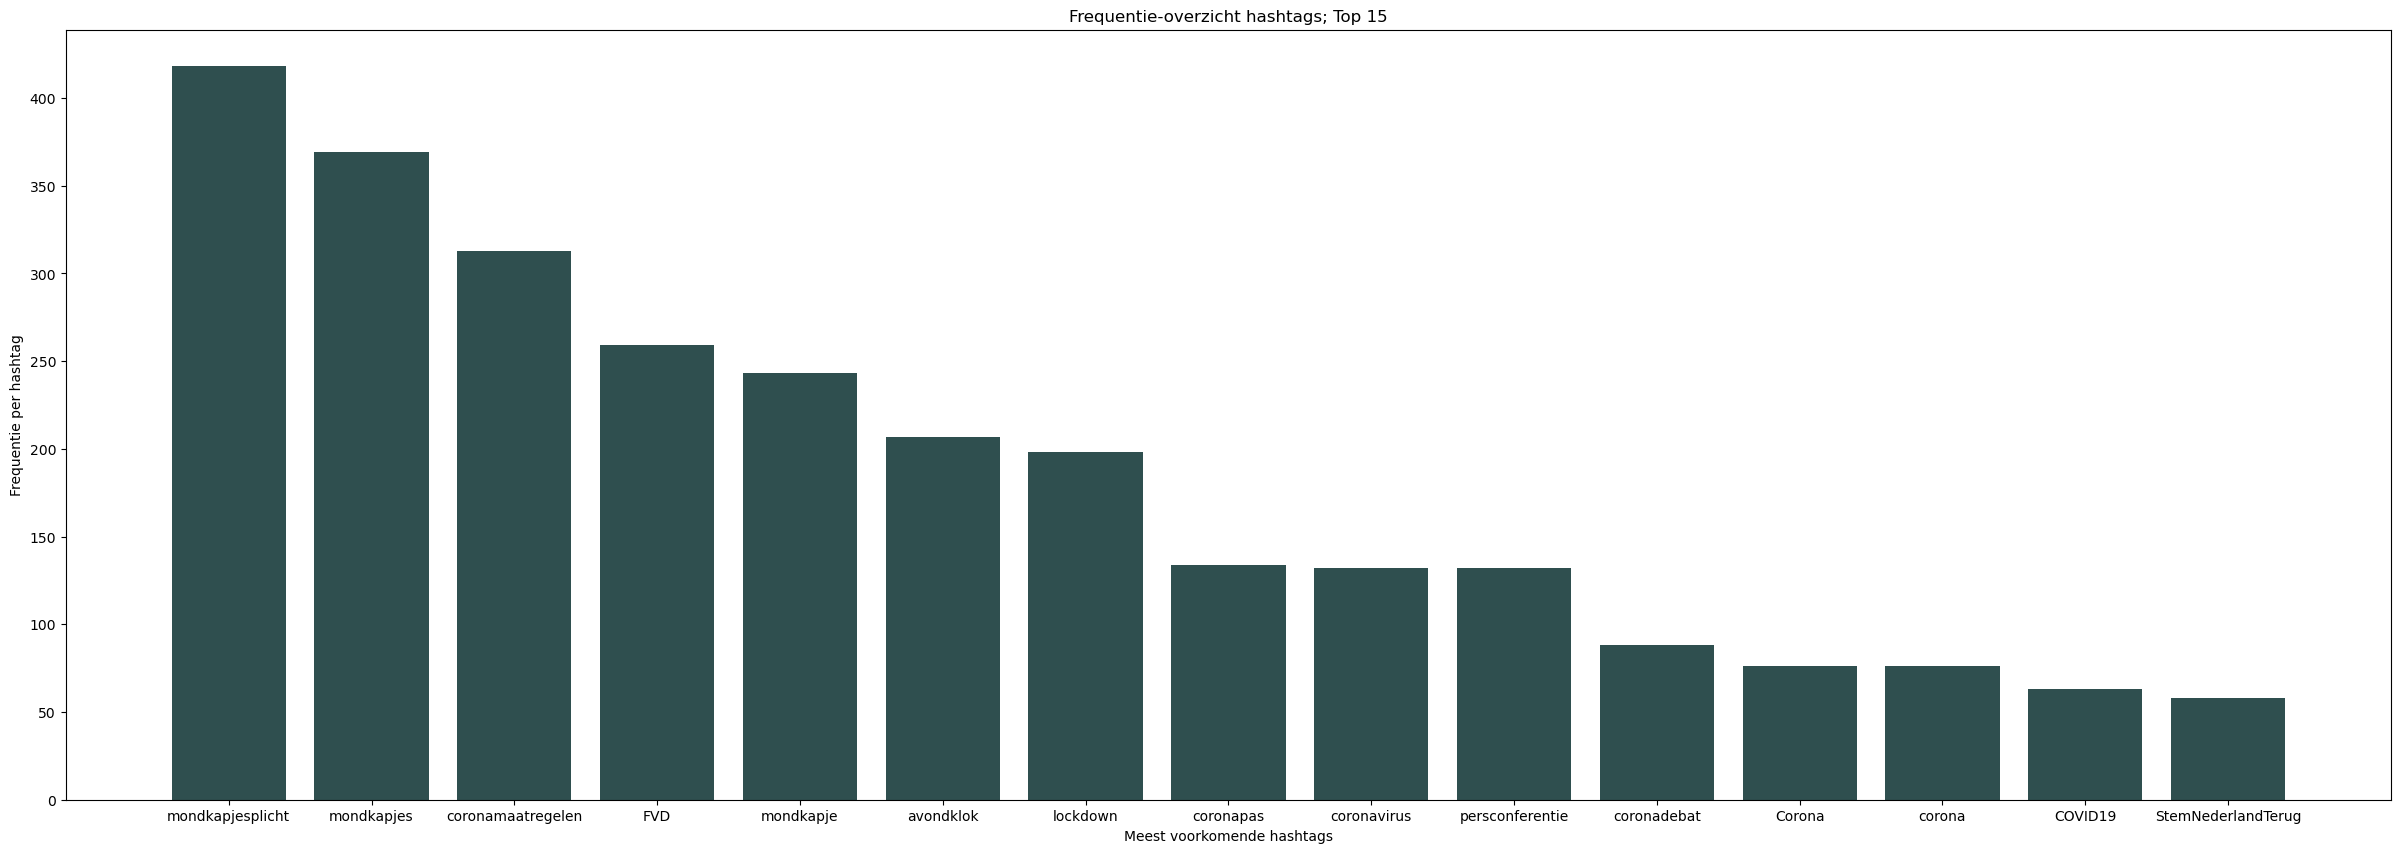

In [32]:
from collections import Counter

# Neem origineel rauwe datafile, dus 'tweets'
hashtags = []
mentions = []

for tweet in tweets:
    hashtags += re.findall(r'#(\w+)', tweet)
    mentions += re.findall(r'@(\w+)', tweet)
    
# Sorteer op frequentie
hashtagFrequentie = Counter(hashtags) 
mentionsFrequentie = Counter(mentions)    

hastagsGesorteerd = hashtagFrequentie.most_common(30) # pak de top 30
mentionsGesorteerd = mentionsFrequentie.most_common(30)

# Eerste barchart alleen van nummers 1 tot 15, anders word het te onoverzichtelijk
hashtagsTop1tot15 = hastagsGesorteerd[0:15]
mentionsTop1tot15 = mentionsGesorteerd[0:15]

# Zippen zodat je het mooi in je barchart kan gebruiken
#  Die asterisk maakt er een dubbele tupel van, wat MatPlotLib nodig heeft
hashtagX, hashtagY = zip(*hashtagsTop1tot15)
mentionX, mentionY = zip(*mentionsTop1tot15)

# Maak bar chart van hashtags 1 t/m 15
plt.figure(figsize=[30, 10])
plt.bar(hashtagX, hashtagY, color='darkslategrey')
plt.xlabel('Meest voorkomende hashtags')
plt.ylabel('Frequentie per hashtag')
plt.title('Frequentie-overzicht hashtags; Top 1 - 15')
plt.show()

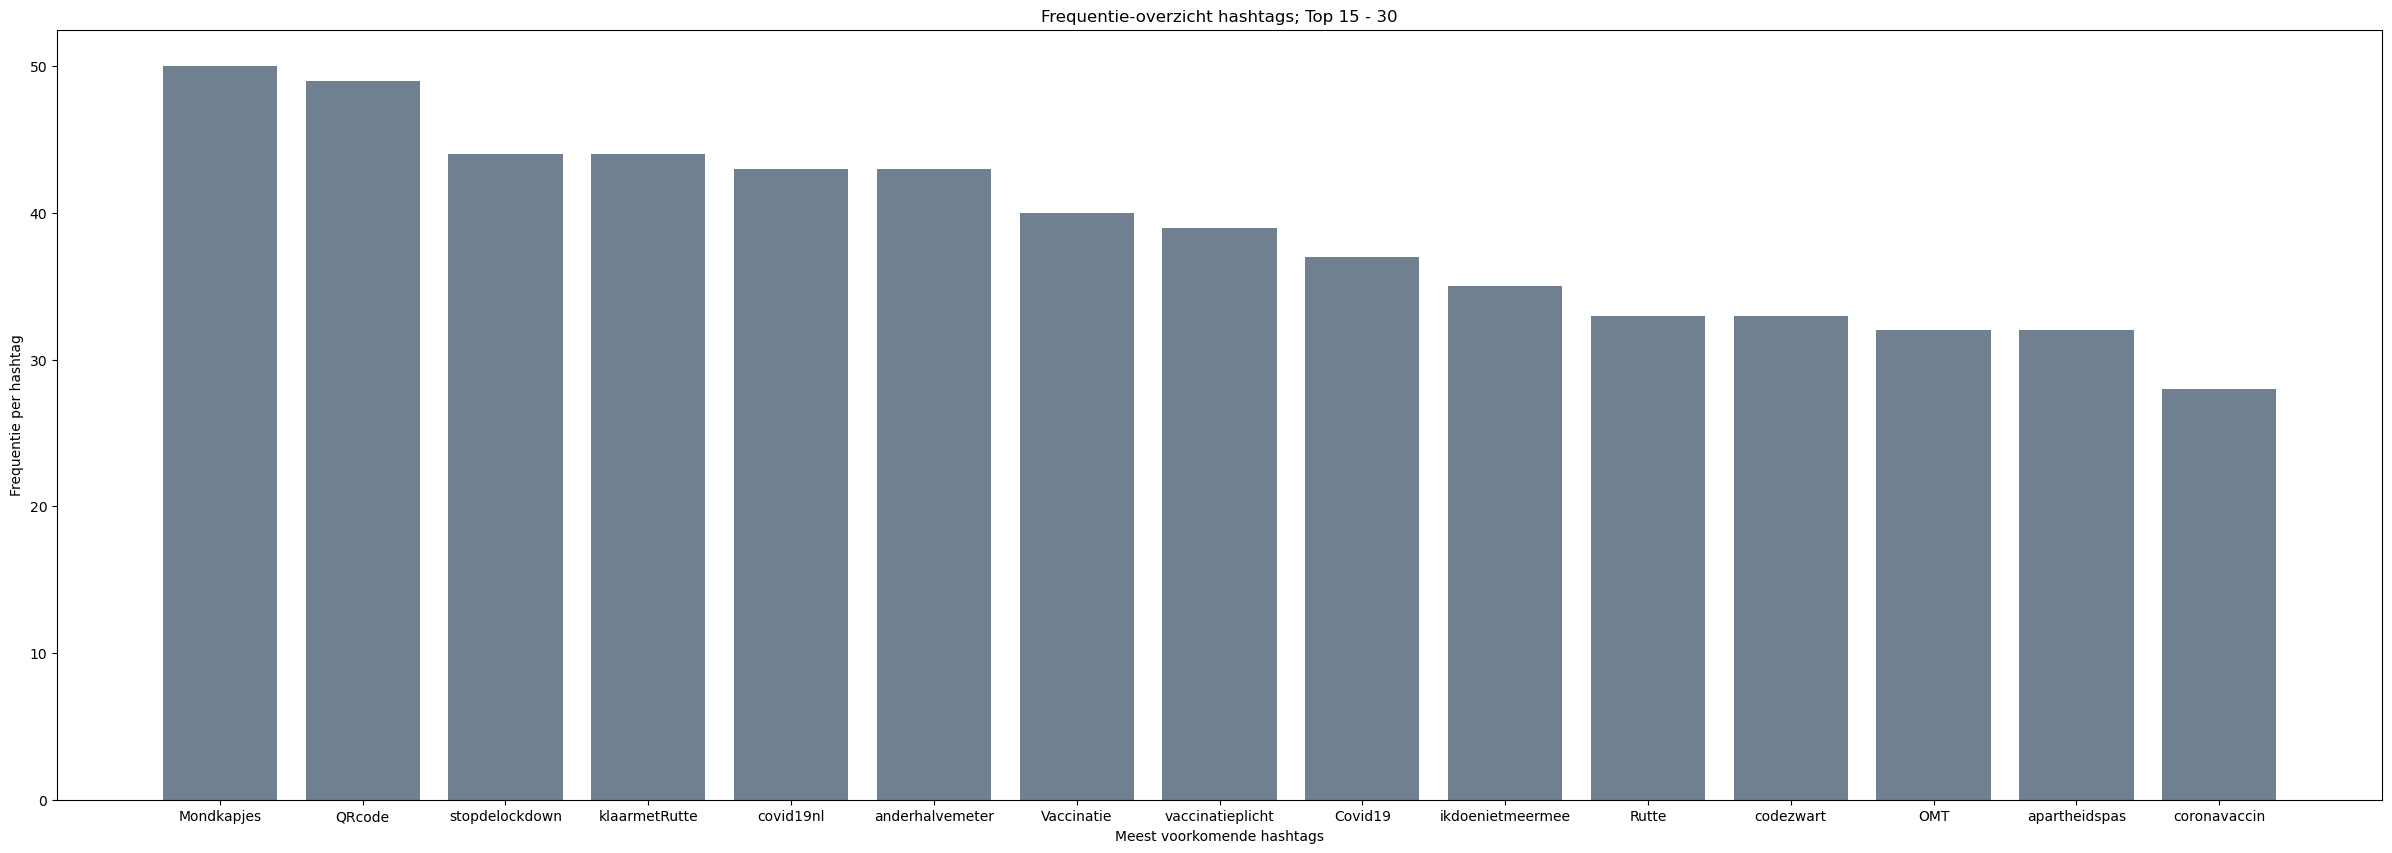

In [34]:
# Hetzelfde als hierboven, maar dan met nummers 15 tot 30 populairste
hashtagsTop15tot30 = hastagsGesorteerd[15:30]

# Maak bar chart van hashtags
hashtagX, hashtagY = zip(*hashtagsTop15tot30)

plt.figure(figsize=[30, 10])
plt.bar(hashtagX, hashtagY, color='slategrey')
plt.xlabel('Meest voorkomende hashtags')
plt.ylabel('Frequentie per hashtag')
plt.title('Frequentie-overzicht hashtags; Top 15 - 30')
plt.show()

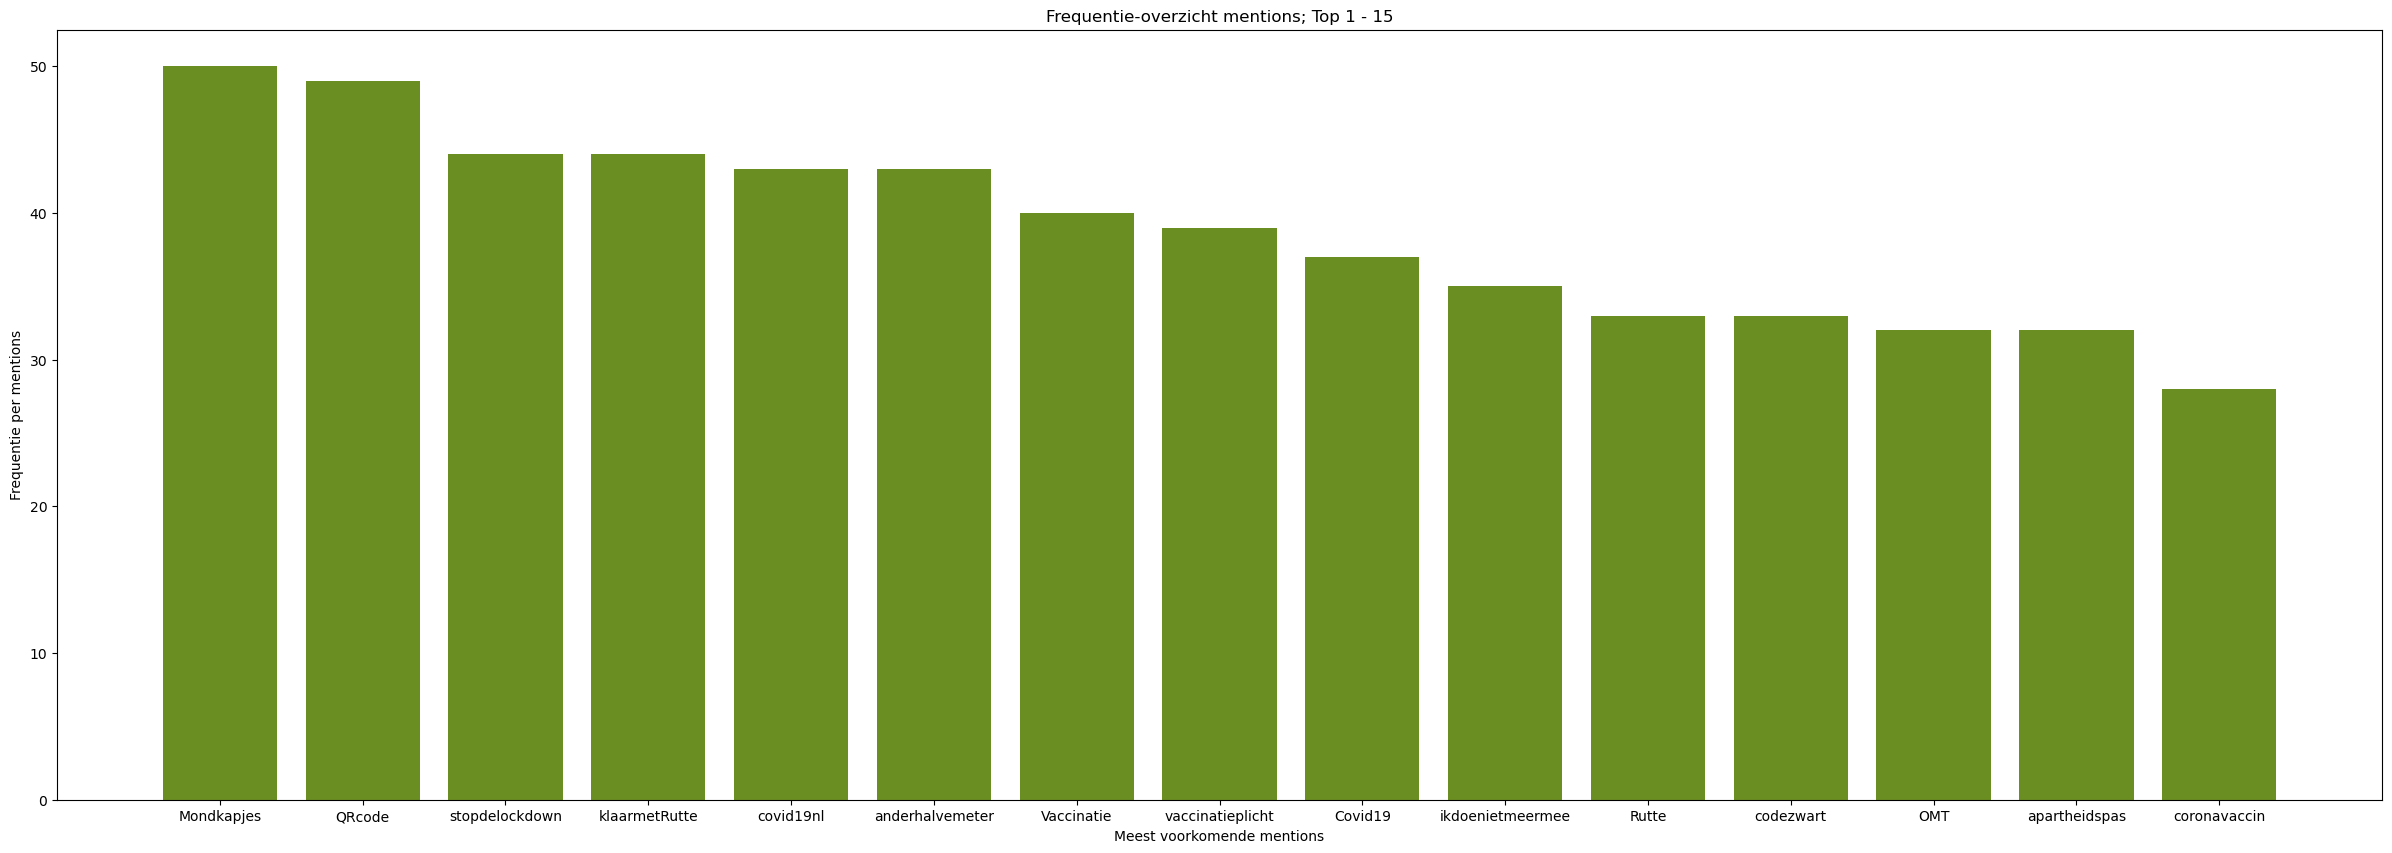

In [42]:
# Nu weer dezelfde aanpak, maar dan voor de mentions
# Maak bar chart van hashtags 1 t/m 15
plt.figure(figsize=[30, 10])
plt.bar(mentionX, mentionY, color='olivedrab')
plt.xlabel('Meest voorkomende mentions')
plt.ylabel('Frequentie per mentions')
plt.title('Frequentie-overzicht mentions; Top 1 - 15')
plt.show()

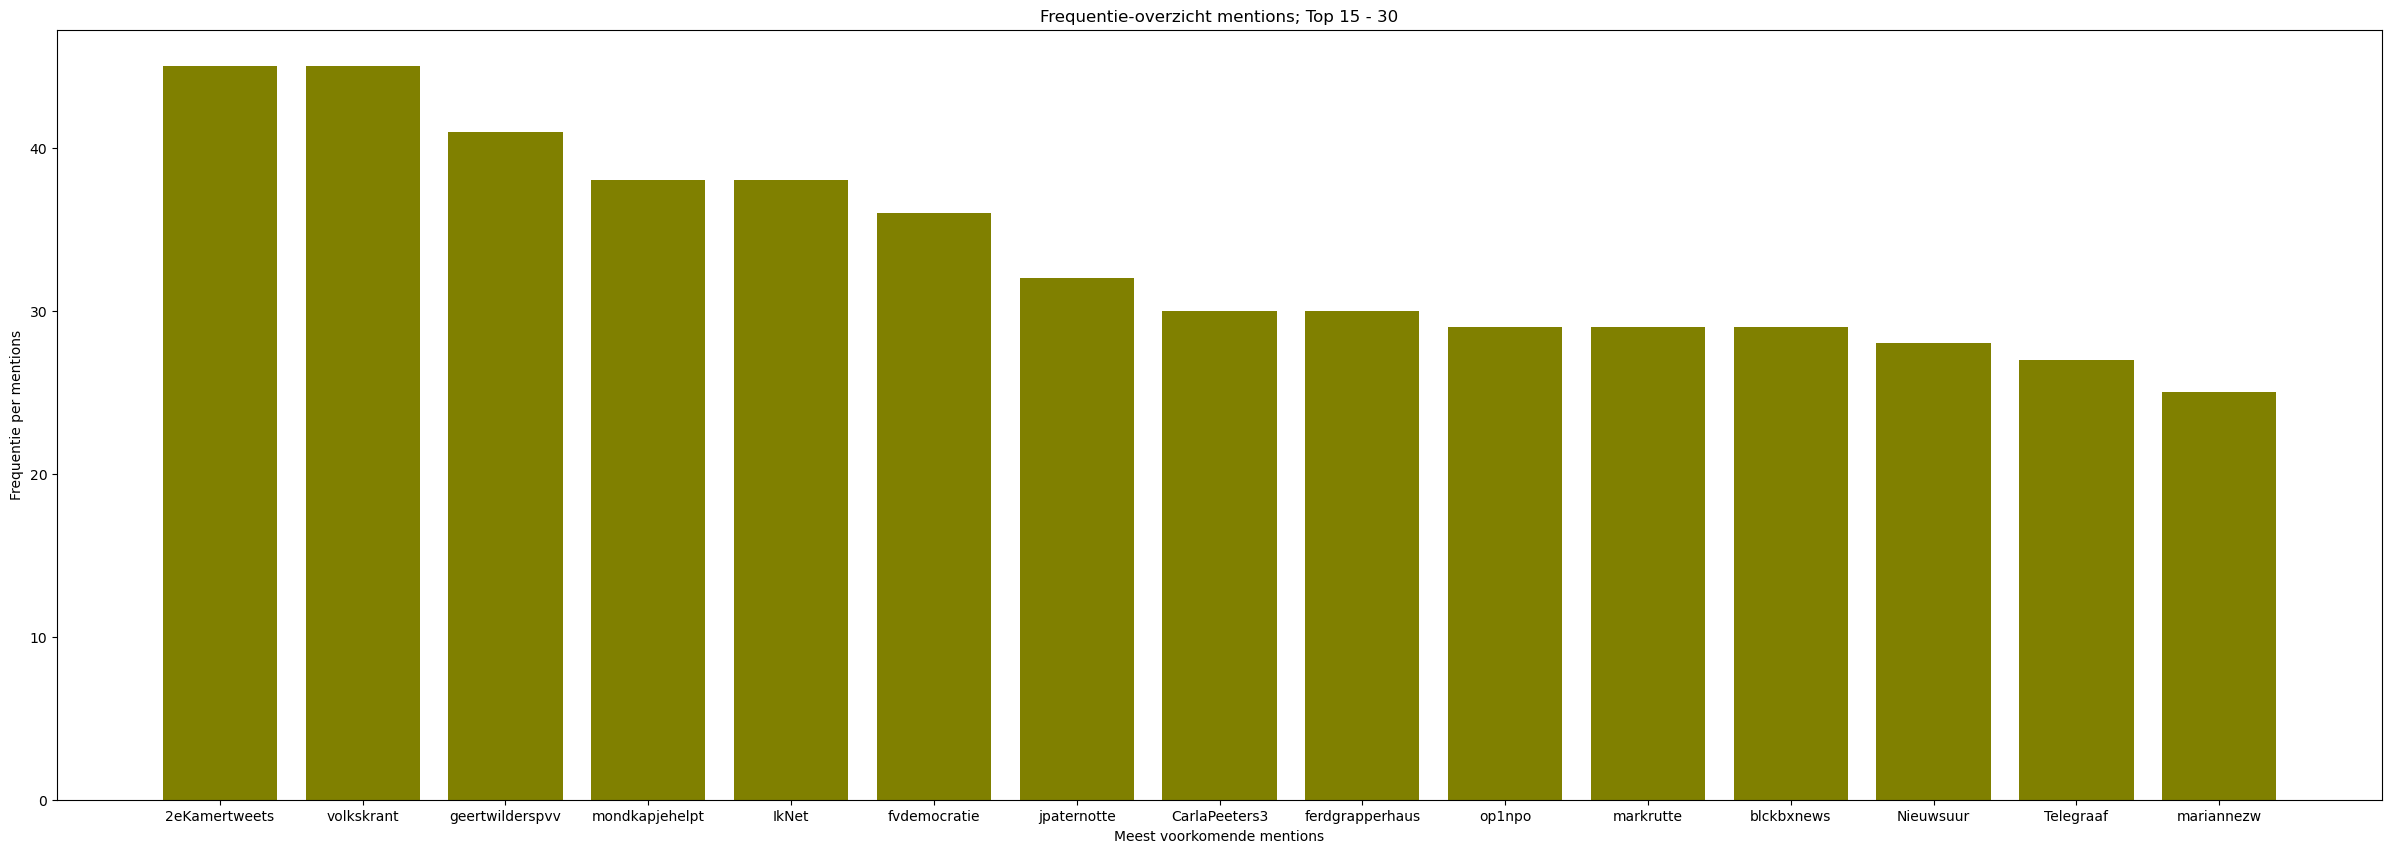

In [44]:
# Hetzelfde als hierboven, maar dan met nummers 15 tot 30 populairste mentions
mentionsTop15tot30 = mentionsGesorteerd[15:30]

# Maak bar chart van hashtags
mentionX, mentionY = zip(*mentionsTop15tot30)

plt.figure(figsize=[30, 10])
plt.bar(mentionX, mentionY, color='olive')
plt.xlabel('Meest voorkomende mentions')
plt.ylabel('Frequentie per mentions')
plt.title('Frequentie-overzicht mentions; Top 15 - 30')
plt.show()

 ## 1.2 Exploratory Data Analysis
 After preprocessing the data, create at least 2 figures or tables that help you understand the data.

 While exploring the data, you may also think about questions such as:
 - Can you spot any differences between Twitter data and usual text data?
 - Does your exploration reveal some issues that would make it difficult to interpret the topics?
 - Can you improve the data by adding additional preprocessing steps?

In [11]:
# TODO: plot figure(s)


## 2.1 Topic modelling and clustering
 In the second part of the assignment, you will first:
 -	Implement a Latent Dirichlet Allocation (LDA) algorithm to identify the discussed topics for your theme
 -	Implement a clustering method  to cluster messages into different groups, then represent the topic of each cluster using a bag of words

While implementing the algorithms, you may use the codes from the recommended packages. In the final report, please explain reasons to select the used algorithm/package. 

In [12]:
# TODO: topic modeling using the LDA algorithm


In [13]:
# TODO: cluster the messages using a clustering algorithm


 ## 2.2 Results, evaluation and Interpretation 
 
Finally, you will describe, evaluate and interpret your findings from two methods. 

- In the report, you need to describe and discuss the similarity and difference of results from two methods.
- While evaluating the results, human judgment is very important, so visualization techniques are helpful to evaluate the identified topics in an interpreted manner. 
    
1. For evaluating the topic modelling algorithm, please first use the interactive tool **[pyLDAvis](https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=)** to examine the inter-topic separation of your findings. 

2. For interpreting the identified topics / clusters of both algorithms, we provide example code for several visualization techiques. You can use multiple ones to evaluate your results or come up with visualisations on your own. The files contain examples for how to use the visualisation functions.


In [14]:
# TODO: evaluation 


# Bonus Tasks 

We would like to challenge you with the following bonus task. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement another clustering algorithm or design your own clustering algorithm. Discuss your findings and explain why this is a better (or worse) clustering algorithm than the above one (the clustering algorithm, not LDA).

2. Can you think of other evaluation methods than the provided visualization techniques? If so, implement one and explain why it is a good evaluation for our task.